In [1]:
import matplotlib.pyplot as plt

def pie_plot(title, labels, numbers):
    colors = ['gray', 'gainsboro']

    # Plot
    plt.pie(numbers, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=False, startangle=140)
    
    plt.title(title)
    plt.axis('equal')
    plt.show()

# Ausführung von Data Mining: Twitter

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
pd.options.display.max_rows = 4000
pd.options.display.max_colwidth = 1000

## Tweets Rohdaten laden

In [28]:
%%time
df1 = pd.read_excel("./data/data_mining/tweetarchivist_cogax_4.xlsx")
df2 = pd.read_excel("./data/data_mining/tweetarchivist_cogax_11.xlsx")
df3 = pd.read_excel("./data/data_mining/tweetarchivist_cogax_15.xlsx")
df4 = pd.read_excel("./data/data_mining/tweetarchivist_cogax_18.xlsx")
print("df1 shape: ", df1.shape)
print("df2 shape: ", df2.shape)
print("df3 shape: ", df3.shape)
print("df4 shape: ", df4.shape)

df1 shape:  (50149, 17)
df2 shape:  (50012, 17)
df3 shape:  (50391, 17)
df4 shape:  (35950, 17)
CPU times: user 29.3 s, sys: 1.54 s, total: 30.8 s
Wall time: 31.2 s


In [29]:
%%time
raw = pd.concat([df1, df2, df3, df4])
print("raw shape: ", raw.shape)

raw shape:  (186502, 17)
CPU times: user 149 ms, sys: 21.3 ms, total: 170 ms
Wall time: 180 ms


In [30]:
raw['Universal Time Stamp'] = pd.to_datetime(raw['Universal Time Stamp'])
raw['date'] = raw['Universal Time Stamp'].dt.date

In [31]:
raw.to_pickle("./data/data_mining/all_tweets_raw.pkl")

## Tweets Sprachfilter

In [32]:
from data_mining.data_cleaning import filter_language
raw_en, raw_non_en = filter_language(raw, 'en')

Filter dataset for language 'en'
	Filtered out 35294 non english tweets
	Actual size: 151208


Anazahl Tweets: EN 151208
Anazahl Tweets: Nicht EN 35294


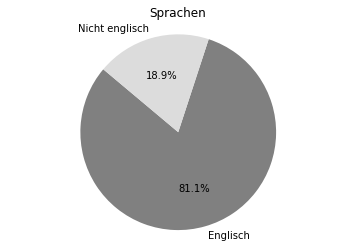

In [33]:
labels = 'Englisch', 'Nicht englisch'
num_en = raw_en.shape[0]
num_not_en = raw_non_en.shape[0]
print("Anazahl Tweets: EN {0}".format(num_en))
print("Anazahl Tweets: Nicht EN {0}".format(num_not_en))
sizes = [num_en, num_not_en]
pie_plot("Sprachen", labels, sizes)

## Tweets Noise Reduction

In [34]:
from data_mining.data_cleaning import noise_reduction
cleaned, duplicates, preprocessed = noise_reduction(raw_en)

Reduce noise on dataset
	Filtered out 107023 duplicates
	Actual size: 44185


In [35]:
labels = 'Noise', 'Clean'
num_duplicates = duplicates.shape[0]
num_clean = cleaned.shape[0]
sizes = [num_duplicates, num_clean]
print("Anazahl Tweets: Noise {0}".format(num_duplicates))
print("Anazahl Tweets: Clean {0}".format(num_clean))
pie_plot("Noise Reduction", labels, sizes)

Anazahl Tweets: Noise 107023
Anazahl Tweets: Clean 44185


In [36]:
labels = 'Noise', 'Clean'
num_bot_in_duplicates = duplicates[duplicates['User Name'].str.contains("bot")].shape[0]
num_bot_in_cleaned = cleaned[cleaned['User Name'].str.contains("bot")].shape[0]
print("Anzahl tweets eines Users mit 'bot' im Namen: Noise {0}".format(num_bot_in_duplicates))
print("Anzahl tweets eines Users mit 'bot' im Namen: Cleaned {0}".format(num_bot_in_cleaned))
sizes = [num_bot_in_duplicates, num_bot_in_cleaned]
pie_plot("User Name mit 'Bot'", labels, sizes)

Anzahl tweets eines Users mit 'bot' im Namen: Noise 305
Anzahl tweets eines Users mit 'bot' im Namen: Cleaned 137


## Tweet-ID File schreiben

In [37]:
from data_mining.data_enhancing import write_id_file
write_id_file(cleaned, "./data/data_enhancing/litecoin_ids.txt")

## Tweets per API Laden

``$ twarc hydrate data/data_enhancing/litecoin_ids.txt > data/data_enhancing/litecoin_tweets.jsonl``

In [38]:
all_tweets = pd.read_json('./data/data_enhancing/litecoin_tweets.jsonl', lines=True)

In [39]:
tweets = all_tweets[['full_text', 'created_at']]
tweets.shape

(40817, 2)

In [40]:
tweets.to_pickle("./data/data_mining/tweets_raw.pkl")